### Investigate 15710 null assessment_item_response_id

In [18]:
%run '../lib/libraries.ipynb'

dython              0.6.1
tinydb              4.2.0


In [19]:
dfFlt = load_df('dfFlt')

dfNull = dfFlt.filter( F.col('assessment_item_response_id').isNull() )

dfNull.count()

15710

- 15,710  observations

##### Are observations correlated with final_score_unweighted has 16,582 zero values

In [20]:
dfNull.filter(F.col('final_score_unweighted') == 0).count()

13715

- 13715 observations related
- Ignore those observations


##### Observations with final_score_unweighted > 0

In [21]:
dfNull = dfNull.filter(F.col('final_score_unweighted') > 0)
dfNull.count()

1995

- 1,995 observations

###### Display distinct values

In [23]:
distinct_val(dfNull)

,0
assignment_max_attempts,1
assignment_late_submission,False
assignment_attempt_number,1
is_manual_scoring_required,False
learner_attempt_status,fully scored
is_deleted,False
assessment_item_response_id,NaN


- New values
  - assignment_late_submission = false
  - is_manual_scoring_required = false


###### Display boxplot of dates

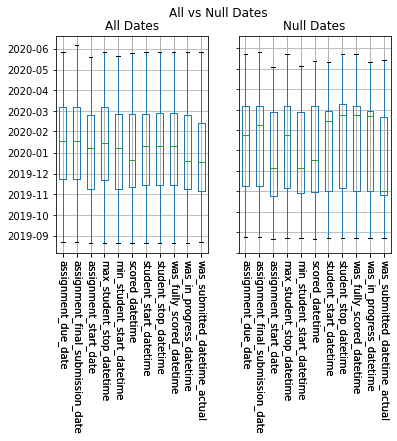

In [24]:
dual_date_boxplot(
    get_random_sample(dfFlt),
    dfNull,
    title1="All Dates",
    title2='Null Dates',
    main='All vs Null Dates'
)

- Medians changed
  - Higher
    - student_start_datetime
    - student_stop_datetime
    - was_fully_scored_datetime
    - was_in_progress_datetime
  - Lower
    - was_submitted_datetime_actual
    - assignment_start_date

###### Categorical / Nominal Correlations Heatmap

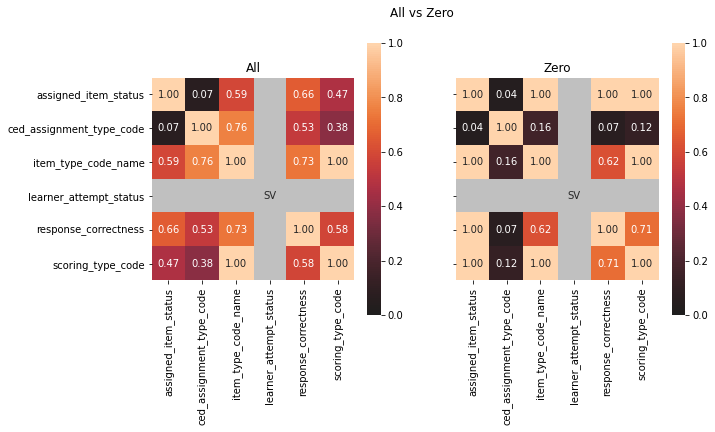

In [26]:
types = get_var_types()

dual_assoc_heatmap(
    get_random_sample(dfFlt).select(*types['nominalVars']),
    dfNull.select(*types['nominalVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- New Strong Correlations
  - assigned_item_status & item_type_code_name
    - investigate further
  - assigned_item_status & response_correctness
    - response_correctness is not accurate
  - assigned_item_status & scoring_type_code
    - investigate further

###### Crostabulation of assigned_item_status & item_type_code_name

In [28]:
pdDf = dfNull.select('assigned_item_status', 'item_type_code_name').toPandas()
pd.crosstab(pdDf.assigned_item_status, pdDf.item_type_code_name)

item_type_code_name,bucketing,choiceMatrix,cloze,equationEntry,essay,fileUpload,fillInTheBlank,graphing,imageLabel,matching,multipleChoice,multipleSelect,numberLine,selectText,shortAnswer,sortable,trueFalse
assigned_item_status,,,,,,,,,,,,,,,,,
offline_scored,12,8,51,403,32,4,59,77,7,16,465,30,5,10,13,10,20


- Only contains assigned_item_status = offline_scored

###### Crostabulation of assigned_item_status & scoring_type_code

In [30]:
pdDf = dfNull.select('assigned_item_status', 'scoring_type_code').toPandas()
pd.crosstab(pdDf.assigned_item_status, pdDf.scoring_type_code)

scoring_type_code,[unassigned],automatic,manual
assigned_item_status,,,
assigned,773,0,0
offline_scored,0,1173,49


- Correlations
  -  assigned_item_status = assigned & scoring_type_code = unassigned
  - assigned_item_status = offline_scored & scoring_type_code = automatic or manual
    - offline_scored means manual scored but 1173 indicates scoring_type_code automatic

###### Binary Correlations Heatmap

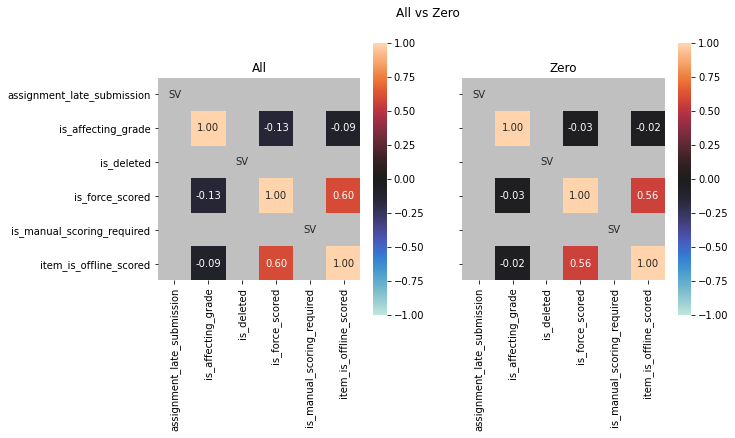

In [27]:
dual_assoc_heatmap(
    get_random_sample(dfFlt).select(*types['binaryVars']),
    dfNull.select(*types['binaryVars']),
    'All',
    'Zero',
    'All vs Zero'
)

- No new correlations

##### Conclusion
- No patern found in the remaining 1,995 observations
- Appear to be random questions not answered by learners
- No further action needed

In [31]:
finish_todo('Investigate 15710 null assessment_item_response_id')